# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: US State Data

## Import Data

In [1]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD,DMDc,DMDBase
from datetime import timedelta, date, datetime
import re 
from urllib.request import urlopen
import json
import plotly.express as px
from control.matlab import *
# Note: Python control toolbox can be found at at https://python-control.readthedocs.io/
import slycot
import scipy 

# for dark theme
plt.rcParams['text.color'] = 'white'
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                    'xtick.color' : "white",
                    'ytick.color' : "white"})

In [2]:
# for light theme
plt.rcParams['text.color'] = 'black'
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black",
                    'xtick.color' : "black",
                    'ytick.color' : "black"})

In [3]:
# import csse_covid_19_daily_reports

# create data frame:
# list of states
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


statesA = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [4]:
# add later date data

rowsum = pd.DataFrame()
stateData = pd.DataFrame()
threshold = 2; # threshold for minimum number of days cutoff

In [5]:
start_date = date(2020, 1, 22)
end_date = date(2020, 1, 31)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            if (np.transpose(rowSum).Confirmed.all()>=threshold): #for threshold
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False): #for threshold
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)

In [6]:
start_date = date(2020, 2, 1)
end_date = date(2020, 3, 9)

for single_date in pd.date_range(start_date, end_date):
    stateIter = iter(states)
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)

    for state in statesA:
        stateName = next(stateIter)
        totalInState = daily.loc[daily['Country/Region'] == 'US']
        totalInState = totalInState.loc[totalInState['Province/State'].str.contains(state)]
        if totalInState.empty == False:
            title = totalInState.loc[:,'Province/State':'Province/State']
            title = title.iloc[[0],:]
            title.at[:,'Province/State']= stateName
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            if (np.transpose(rowSum).Confirmed.all()>=threshold):
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False):
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)

In [7]:
start_date = date(2020, 3, 10)
end_date = date(2020, 3, 21)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if (totalInState.empty == False):
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                if (np.transpose(rowSum).Confirmed.all()>=threshold):
                    newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False):
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)


In [8]:
start_date = date(2020, 3, 22)
end_date = end_date = datetime.date(datetime.now())

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    try:
        daily = pd.read_csv(url, error_bad_lines=False)
        for state in states:
            totalInState = daily.loc[daily['Province_State'] == state]
            title = totalInState.loc[:,'Province_State':'Province_State']
            if totalInState.empty == False:
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                if (np.transpose(rowSum).Confirmed.all()>=threshold):
                    newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
        if (newStateData.empty == False):
            newStateData = newStateData.set_index('Province_State').drop(columns=['index'])
            stateData = pd.concat([stateData,newStateData],axis=1)
    except:
        print('Todays file has not yet been uploaded')

Todays file has not yet been uploaded


In [9]:
stateData = stateData.fillna(0)
stateData

,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020,03-31-2020,...,10-11-2020,10-12-2020,10-13-2020,10-14-2020,10-15-2020,10-16-2020,10-17-2020,10-18-2020,10-19-2020,10-20-2020
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,157,196,242,381,517,587,694,825,899,987,...,165342,166076,167193,167977,169162,170374,171662,172626,173485,174528
Alaska,20,30,34,41,56,58,85,102,114,119,...,9686,9877,10028,10170,10323,10549,10760,10980,11182,11391
Arizona,152,235,326,401,508,665,773,919,1157,1289,...,225575,226050,226734,227635,228748,229486,230459,231149,231897,232937
Arkansas,165,192,219,280,335,381,409,426,473,523,...,92833,93487,94167,95246,96524,97539,98422,99066,99597,100441
California,1646,2108,2538,2998,3899,4657,5095,5852,7138,8210,...,855190,857913,861310,865204,868148,871253,873614,875692,879645,883746
Colorado,591,704,723,1021,1430,1433,1740,2307,2311,2966,...,78437,79013,80061,80753,81895,83207,84346,85279,86351,87559
Connecticut,327,415,618,875,1012,1291,1524,1993,2571,3128,...,60038,61377,61697,61861,62028,62830,62830,62830,64021,64455
Delaware,56,68,104,119,130,163,214,232,264,319,...,22130,22289,22394,22465,22560,22724,22942,23093,23196,23325
Florida,1004,1227,1412,1682,2357,2900,3763,4246,5473,6741,...,734491,736024,738749,741632,744988,748437,752481,755020,756727,760389


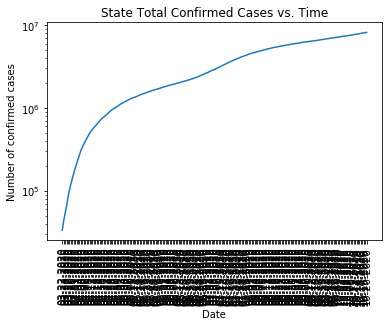

In [10]:
# plot confirmed cases vs. time
plt.title('State Total Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

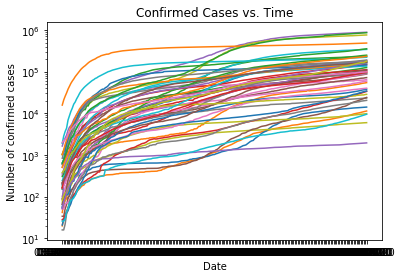

In [11]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(np.transpose(stateData.loc[:,'01-22-2020':]))

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')


plt.show()

## Convert Data into an Array

In order to make most initial conditions greater than zero, the start date was chosen to be that in which all states reach an indicated threshold.  This will increase the accuracy of the reconstruction in time.

In [32]:
# Select data with few initial conditions of 0
scaledData = stateData
# Convert data to array
scaledData = scaledData.to_numpy()
scaledData

array([[   157,    196,    242, ..., 172626, 173485, 174528],
       [    20,     30,     34, ...,  10980,  11182,  11391],
       [   152,    235,    326, ..., 231149, 231897, 232937],
       ...,
       [    16,     16,     22, ...,  20081,  20293,  20520],
       [   381,    425,    481, ..., 166186, 173891, 178482],
       [    26,     26,     29, ...,   9025,   9311,   9526]], dtype=int64)

## Take DMD

**Modes**: Columns are the low-rank structures individuated


**Dynamics**: Rows refer to the time evolution of each mode


**Eigs**: eigenvalues of the low dimensional operator

* If an eigenvalue is on the unit circle, the corresponding mode will be stable; while if an eigenvalue is inside or outside the unit circle, the mode will converge or diverge, respectively.

**Reconstructed_data**: the approximated system evolution

### DMD

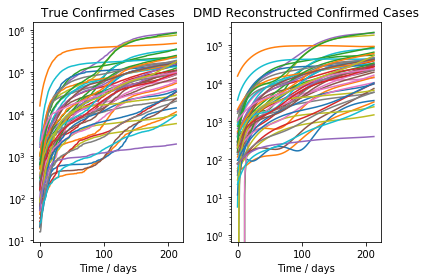

In [101]:
dmd = DMD(svd_rank=7) # truncated SVD
dmd.fit(scaledData)

# plot true data
plt.subplot(1, 2, 1)
plt.title('True Confirmed Cases')
plt.plot(scaledData.T)
plt.xlabel('Time / days')
plt.yscale('log')

# plot dmd reconstructed data
plt.subplot(1, 2, 2)
plt.title('DMD Reconstructed Confirmed Cases')
plt.plot(dmd.reconstructed_data.real.T)
plt.xlabel('Time / days')
plt.yscale('log')
plt.tight_layout()

plt.show()

Eigenvalue (0.9932458354569453+0.05620094997428381j): distance from unit circle 0.010304163569422653
Eigenvalue (0.9932458354569453-0.05620094997428381j): distance from unit circle 0.010304163569422653
Eigenvalue (1.0163813530836023+0j): distance from unit circle 0.0330310548960544
Eigenvalue (1.0096558229208266+0j): distance from unit circle 0.019404880757931453
Eigenvalue (0.9985251705069136+0.025886880038164556j): distance from unit circle 0.002277353306028851
Eigenvalue (0.9985251705069136-0.025886880038164556j): distance from unit circle 0.002277353306028851
Eigenvalue (0.9637244248692974+0j): distance from unit circle 0.07123523291034184


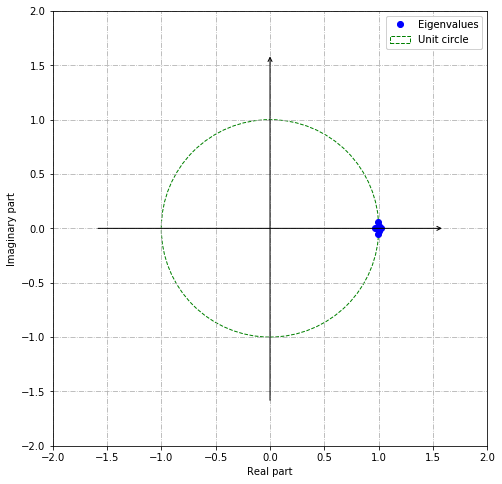

In [102]:
# eigenvalues of low dim operator

for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))
dmd.plot_eigs(show_axes=True, show_unit_circle=True)


The eigenvalues are discrete, so their placement corresponds to the time sequences below:

![title](img/rootLocusPoleLocations.PNG)

All eigenvalues inside of the unit circle converge to a final value, while the eigenvalues outside of the unit circle are unstable (do not converge).  The unstable eigenvalues correspond to unstable modes.  Most eigenvalues are located on the positive real axis, corresponding to low frequency dynamics.

Eigenvalue -0.00517880949441925, 0.05652285098154048
Eigenvalue -0.00517880949441925, -0.05652285098154048
Eigenvalue 0.016248626254261274, 0.0
Eigenvalue 0.009609503392767013, 0.0
Eigenvalue -0.0011399752094236318, 0.02591930931356752
Eigenvalue -0.0011399752094236318, -0.02591930931356752
Eigenvalue -0.036949891557312174, 0.0


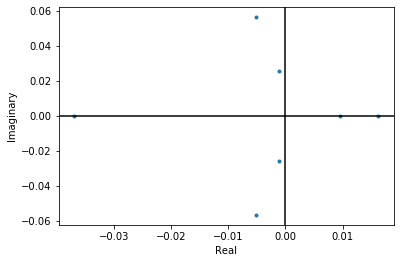

In [103]:
# Continuous Eigenvalues

plt.plot(np.log(dmd.eigs).real,np.log(dmd.eigs).imag,'.')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Real')
plt.ylabel('Imaginary')

for eig in dmd.eigs:
    print('Eigenvalue {}, {}'.format(np.log(eig).real, np.log(eig).imag))

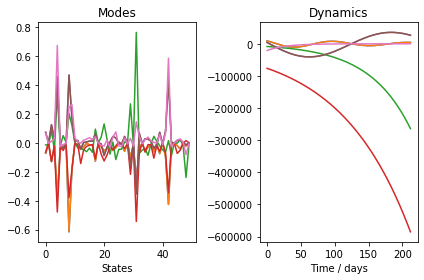

In [104]:
# modes
plt.subplot(1, 2, 1)
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
    plt.xlabel('States')


# dynamics
plt.subplot(1, 2, 2)
for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
    plt.xlabel('Time / days')
plt.tight_layout()

plt.show()

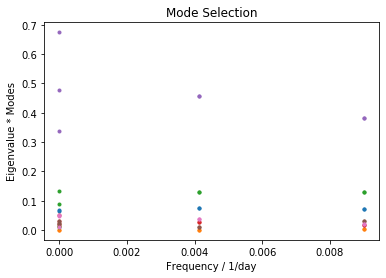

In [105]:
# Mode Selection

# Continuous Time Oscillatory Frequency for 24 hour period (units 1/h)
freq = (np.log(dmd.eigs)).imag/(2*np.pi)

i = 0
for eig in dmd.eigs:
    plt.plot(abs(freq),(abs(dmd.modes.real*eig))[i,:],'.')
    i+=1
plt.title('Mode Selection')
plt.xlabel('Frequency / 1/day')
plt.ylabel('Eigenvalue * Modes')
plt.show()


In [106]:
# Modes map

dmd = DMD(svd_rank=1)
dmd.fit(scaledData) # transpose so snapshots (state data) are arranged by column


with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = dynamic.real
fig = px.choropleth(df,    locations=statesA,  
                           locationmode="USA-states",
                           color=abs(dmd.modes),
                           range_color=(0,0.8),
                           scope="usa",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Predict

1. Reduce data from last time step using dynamic modes:
$$
\mathbf{x}_k^{\sim} = U^{+}\mathbf{x}_k
$$

2. Use previous reduced data time step to get the next reduced data array:
$$
\mathbf{x}_{k+1}^{\sim} = \mathbf{A}\mathbf{x}_k^{\sim} 
$$

3. Multiply the reduced data by the modes to obtain the predicted data array:
$$
\mathbf{x}_{k} = \mathbf{U}\mathbf{x}_k^{\sim} 
$$

In [120]:
# Take DMD of data
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData)

At = dmd.atilde #Koopman operator


In [121]:
# compute reduced data prediction and actual data prediction

# Intialize
days = 20 # number of days in the future to predict
x = np.zeros((len(scaledData[:,-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning:

Casting complex values to real discards the imaginary part



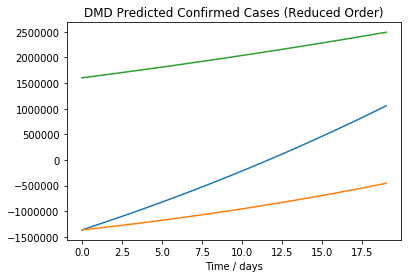

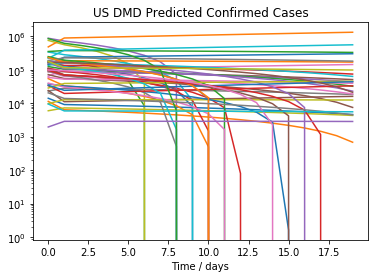

In [122]:
# Plot predicted cases
plt.plot(xt.T)
plt.title('DMD Predicted Confirmed Cases (Reduced Order)')
plt.xlabel('Time / days')
plt.show()

plt.plot(x.T)
plt.title('US DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

#### Testing prediction accuracy:

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning:

Casting complex values to real discards the imaginary part



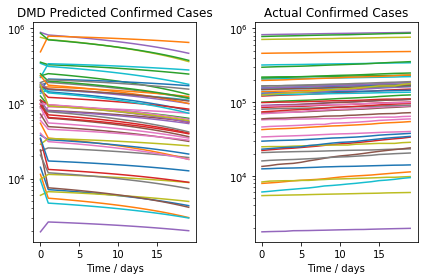

In [125]:
# Take DMD of data
days = 20 # number of days in the future to predict
testDays = np.size(scaledData,1)-days

dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData[:,:testDays]) # fit for selected days

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
x = np.zeros((len(scaledData[:,testDays*-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
plt.subplot(1, 2, 1)
plt.plot(x.T)
plt.title('DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(scaledData[:,testDays:].T)
plt.title('Actual Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')
plt.tight_layout()

plt.show()


In [126]:
['Predicted Day {}: Mean Error {} %, Standard Deviation of Error +/-{} %'.format(i+1,np.mean(np.abs(x[:,i]-scaledData[:,i+testDays])/scaledData[:,i+testDays])*100,np.std(np.abs(x[:,i]-scaledData[:,i+testDays])/scaledData[:,i+testDays])*100) for i in range(days)]

['Predicted Day 1: Mean Error 20.977418305243532 %, Standard Deviation of Error +/-14.464953699194002 %',
 'Predicted Day 2: Mean Error 21.154899970590392 %, Standard Deviation of Error +/-17.187233699105377 %',
 'Predicted Day 3: Mean Error 21.851482842051468 %, Standard Deviation of Error +/-16.670973615409437 %',
 'Predicted Day 4: Mean Error 22.41187089848619 %, Standard Deviation of Error +/-16.388263449623935 %',
 'Predicted Day 5: Mean Error 22.958593155797384 %, Standard Deviation of Error +/-16.080306277307745 %',
 'Predicted Day 6: Mean Error 23.65216778550082 %, Standard Deviation of Error +/-16.120957333849827 %',
 'Predicted Day 7: Mean Error 24.6190719953485 %, Standard Deviation of Error +/-16.22963031482384 %',
 'Predicted Day 8: Mean Error 25.76899330319356 %, Standard Deviation of Error +/-16.094246296002034 %',
 'Predicted Day 9: Mean Error 27.131782403143827 %, Standard Deviation of Error +/-16.06710827817783 %',
 'Predicted Day 10: Mean Error 28.509299752938393 %, 

Predictions are only valid for about 20 days.  The highest accuracy predictions occur at an svd rank of 3.

### DMDc: DMD with Control

Since we want to add the control, the evolution of the complex system can be formally summarized as:$$
\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}\mathbf{u}_k,
$$where the operators $\mathbf{A}$ and $\mathbf{B}$ are the ones we will approximate using DMD.

In [127]:
dmdc = DMDc()
dmdc.fit(scaledData, np.zeros(np.size(scaledData,1)-1)) # fit dmdc with no control

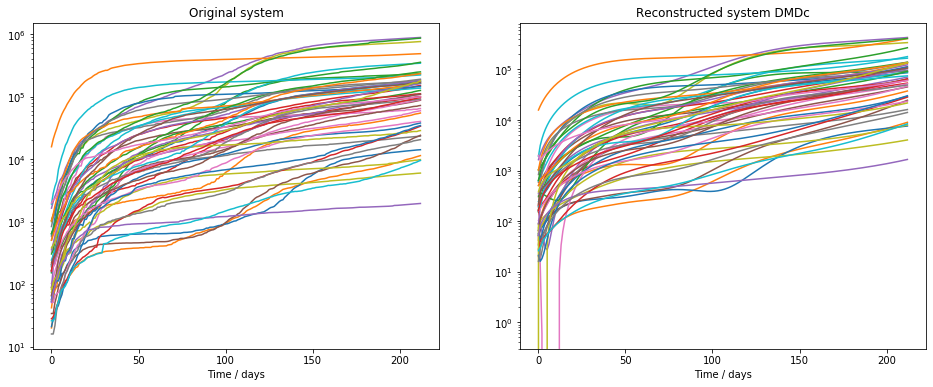

In [128]:
# plot reconstructed system

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Original system')
plt.xlabel('Time / days')
plt.yscale('log')
plt.plot(scaledData.T)

plt.subplot(122)
plt.title('Reconstructed system DMDc')
plt.xlabel('Time / days')
plt.yscale('log')
plt.plot(dmdc.reconstructed_data().real.T)



plt.show()

#### Determine Optimal Input for Control

In [129]:

# State space system
dmd = DMD(svd_rank=7)
dmd.fit(scaledData)

# Define linear systems (in state-space form)
A = dmd.atilde # # of days x # of days
Ac = scipy.linalg.logm(A) # find equivalent continuous-time A matrix
B = np.ones((len(A),1))
B[:,0] = 1
C = np.ones((1,len(A)))

# system parameters
x0 = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,0]) # initial condition 
t = np.arange(0,50,1);

sys1 = StateSpace(Ac,B,C,0)
sys1tf = ss2tf(sys1)
sys1tf



        7 s^6 - 0.1479 s^5 + 0.02025 s^4 + 0.0001126 s^3 - 0.0001151 s^2 + 5.609e-06 s - 6.367e-08
----------------------------------------------------------------------------------------------------------
s^7 + 0.02373 s^6 + 0.003259 s^5 + 5.345e-05 s^4 - 7.318e-07 s^3 + 3.522e-08 s^2 - 1.651e-09 s + 1.251e-11

C:\Users\julia\Anaconda3\lib\site-packages\control\timeresp.py:318: ComplexWarning:

Casting complex values to real discards the imaginary part



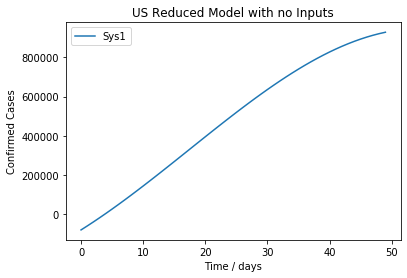

In [130]:
# With no input, these will be the same

yout1,t1,xout1 = lsim(sys1,U = 0.0, T = t, X0 = x0)
fig, ax = plt.subplots()
ax.plot(t,yout1,label='Sys1')
leg = ax.legend();

plt.title('US Reduced Model with no Inputs')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');

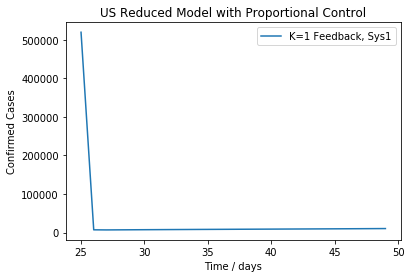

In [131]:
# Try proportional control
sysfb1 = feedback(sys1,1)
fbind = 25 # time index when feedback starts

# Run closed-loop systems
youtfb1,tfb1,xoutfb1 = lsim(sysfb1, T = t[fbind:], X0 = xout1[fbind])

# Plot results
fig, ax = plt.subplots()
ax.plot(tfb1,youtfb1,label='K=1 Feedback, Sys1')



plt.title('US Reduced Model with Proportional Control')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');

leg = ax.legend();

K values: [[ 0.2495872   0.15808636 -1.42882852  0.83493151 -0.92621285  0.58849256
   0.65446003]]
S values: [[  180957.02987135   122357.45135815 -1054318.00472734   605778.31703897
   -681962.40708841   404928.83329501   447217.50047682]
 [  122357.45135815    83135.26859416  -714102.09182245   410670.09201305
   -461749.16471661   273344.6316507    302152.44849045]
 [-1054318.00472734  -714102.09182245  6147542.02886714 -3534060.15761824
   3975180.74387559 -2357442.91102984 -2605682.45916613]
 [  605778.31703897   410670.09201305 -3534060.15761824  2033726.79004693
  -2284589.95556121  1353846.15322008  1498121.91145251]
 [ -681962.40708841  -461749.16471661  3975180.74387559 -2284589.95556121
   2571339.30521784 -1525757.21686442 -1685082.58986208]
 [  404928.83329501   273344.6316507  -2357442.91102984  1353846.15322008
  -1525757.21686442   908291.79022897  1001637.97561434]
 [  447217.50047682   302152.44849045 -2605682.45916613  1498121.91145251
  -1685082.58986208  1001637.9

C:\Users\julia\Anaconda3\lib\site-packages\control\timeresp.py:318: ComplexWarning:

Casting complex values to real discards the imaginary part



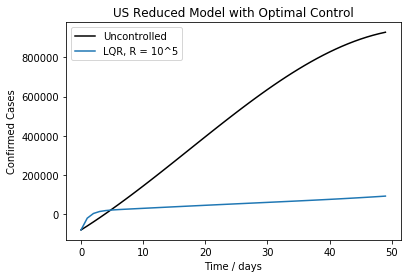

In [135]:
# LQR control

Q = np.identity(len(A));
R = 100000;
Klqr1,Slqr1,Plqr1 = lqr(Ac,B,Q,R) 

sysLQR1 = StateSpace(Ac- Klqr1*B,B,C,0)

youtfb1,tfb1,xoutfb1 = lsim(sysLQR1, T = t, X0 = x0)

fig, ax = plt.subplots()
ax.plot(t,yout1,'k',label='Uncontrolled')
ax.plot(tfb1,youtfb1,label='LQR, R = 10^5')
leg = ax.legend()
plt.title('US Reduced Model with Optimal Control')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');




print('K values:', Klqr1)
print('S values:', Slqr1)
print('P values:', Plqr1)


